# In this notebook I want to use the "Autonomous Vehicle Disengagement Reports" dataset and explore it. So let's begin.


## Disengagement in autonomous driving refers to a situation where a human driver takes over control of a vehicle from its autonomous system, either because the system malfunctions or because the driver deems the situation too complex for the system to handle.

# Step 1 | Importing libraries

In [153]:
# for reading and data manipulations
import pandas as pd 
import numpy as np
# for visulization
import matplotlib.pyplot as plt
import seaborn as sns
# for datetime
from dateutil import parser

# Step 2 | Reading dataset

In [119]:
data = pd.read_csv("/kaggle/input/2019-autonomous-vehicle-disengagement-reports/2019AutonomousVehicleDisengagementReports.csv")
df = pd.DataFrame(data)
df

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...
...,...,...,...,...,...,...,...,...,...
8880,"Zoox, Inc",AVT012,10/29/2019,~6607,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...
8881,"Zoox, Inc",AVT012,11/3/2019,~6839,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...
8882,"Zoox, Inc",AVT012,11/18/2019,~7625,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...
8883,"Zoox, Inc",AVT012,11/20/2019,~5424,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...


## The columns are : 

Manufacturer : Company name

Permit Number : Permit of the company to test self-driving cars

DATE : disengagement date

VIN NUMBER : Vehicle's unique id

VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER(Yes or No)

DRIVER PRESENT(Yes or No)

DISENGAGEMENT INITIATED BY(AV System, Test Driver, Remote Operator, or Passenger)

DISENGAGEMENTLOCATION (Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)

DESCRIPTION OF FACTS CAUSING DISENGAGEMENT

**So the basic information we can get from this dataset in the first sight is that it has 8885 rows which means there are 8885 reports of autonomous vehicles and also there are 9 coulmns to five us more details of each disengagements.**

# Step 3 | Data Cleaning

**In the "DATE" column some of dates are seperated with dot and some with slash and ect so I changed them all and then converted them to datetime. Now let's get more info.**

In [120]:
# creating new column with NaT values
df["date"] = pd.NaT  

# changing "-"
mask_dash = df["DATE"].str.contains("-", na=False)
df.loc[mask_dash, "date"] = pd.to_datetime(df.loc[mask_dash, "DATE"], errors="coerce")

# changing "/"
mask_slash = df["DATE"].str.contains("/", na=False)
df.loc[mask_slash, "date"] = pd.to_datetime(df.loc[mask_slash, "DATE"], format="%m/%d/%Y", errors="coerce")

# changing "."
mask_dot = df["DATE"].str.contains(r"\.", na=False)
df.loc[mask_dot, "date"] = pd.to_datetime(df.loc[mask_dot, "DATE"], format="%m.%d.%Y", errors="coerce")

# changing dates which include month
mask_month_name = df["DATE"].str.contains(r"[A-Za-z]", na=False)
df.loc[mask_month_name, "date"] = pd.to_datetime(df.loc[mask_month_name, "DATE"], errors="coerce")

# changing the remainings 
mask_remaining = df["date"].isna() & df["DATE"].notna()
df.loc[mask_remaining, "date"] = pd.to_datetime(df.loc[mask_remaining, "DATE"], errors="coerce")


In [121]:
problematic_dates = df.loc[df["date"].isna(), "DATE"].unique()
print(problematic_dates)


['05/Dec/18' '11/Dec/18' '07/Jan/19' ... '11/21/19' '11/22/19' '11/25/19']


In [122]:
def try_parsing_date(text):
    try:
        # dateutil.parser.parse می‌تونه خیلی فرمت‌ها رو تشخیص بده
        return parser.parse(text)
    except:
        return pd.NaT

In [123]:
mask_null_date = df["date"].isna()

df.loc[mask_null_date, "date"] = df.loc[mask_null_date, "DATE"].apply(try_parsing_date)

In [124]:
df.drop(columns=["DATE"], inplace=True)
df

,Manufacturer,Permit Number,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,date
0,AImotive Inc.,AVT003,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-06
1,AImotive Inc.,AVT003,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-10
2,AImotive Inc.,AVT003,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-10
3,AImotive Inc.,AVT003,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2019-04-23
4,AImotive Inc.,AVT003,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,2019-05-14
...,...,...,...,...,...,...,...,...,...
8880,"Zoox, Inc",AVT012,~6607,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,2019-10-29
8881,"Zoox, Inc",AVT012,~6839,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,2019-11-03
8882,"Zoox, Inc",AVT012,~7625,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,2019-11-18
8883,"Zoox, Inc",AVT012,~5424,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,2019-11-20


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8885 entries, 0 to 8884
Data columns (total 9 columns):
 #   Column                                                                                          Non-Null Count  Dtype         
---  ------                                                                                          --------------  -----         
 0   Manufacturer                                                                                    8885 non-null   object        
 1   Permit Number                                                                                   8885 non-null   object        
 2   VIN NUMBER                                                                                      8884 non-null   object        
 3   VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER
(Yes or No)                                    8884 non-null   object        
 4   DRIVER PRESENT
(Yes or No)                                                                      8

**So here you cam see it is difficult to see the result because of the length of some column names. I want to change them.**

In [126]:
df.columns

Index(['Manufacturer', 'Permit Number', 'VIN NUMBER',
       'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)',
       'DRIVER PRESENT\n(Yes or No)',
       'DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)',
       'DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)',
       'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT', 'date'],
      dtype='object')

In [127]:
df.rename(columns={
    "VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)": "DRIVER NECESSITY",
    "DRIVER PRESENT\n(Yes or No)": "DRIVER PRESENT",
    "DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)" :"INITIATED BY",
    "DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)":"LOCATION",
    "DESCRIPTION OF FACTS CAUSING DISENGAGEMENT":"DESCRIPTION"
    
}, inplace=True)
df.rename(str.lower, axis='columns', inplace=True)

In [128]:
columns = df.columns
columns

Index(['manufacturer', 'permit number', 'vin number', 'driver necessity',
       'driver present', 'initiated by', 'location', 'description', 'date'],
      dtype='object')

**Now it is better.**

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8885 entries, 0 to 8884
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   manufacturer      8885 non-null   object        
 1   permit number     8885 non-null   object        
 2   vin number        8884 non-null   object        
 3   driver necessity  8884 non-null   object        
 4   driver present    8884 non-null   object        
 5   initiated by      8884 non-null   object        
 6   location          8884 non-null   object        
 7   description       8884 non-null   object        
 8   date              8883 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 624.9+ KB


In [130]:
df.describe(include="all")

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date
count,8885,8885,8884,8884,8884,8884,8884,8884,8883
unique,28,27,289,5,4,4,11,469,NaN
top,Toyota Research Institute,AVT050,JTHDU1EF3G5020098,No,Yes,Test Driver,Street,Safety Driver proactive disengagement.,NaN
freq,2947,2947,900,4369,4934,6037,4668,1780,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-13 17:06:44.243386112
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-09 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-12 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-24 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-30 00:00:00


**Here we can see that this dataset includes 28 companies with reports of 37 vehicles. As it was mentioned in the dataset discription, the testing took place on California’s public roads between 2018 and 2019.
Interestingly, the "driver necessity" column shows 5 unique values, although according to the description it should only contain "yes" or "no". The column "driver present" has the same problem. This inconsistency suggests that the column needs further exploration and cleaning.
There are 11 unique values for the location column, and the most frequent one is "street", indicating that most disengagements happened on streets.**

In [131]:
df["driver necessity"].value_counts()

driver necessity
No     4369
no     2054
NO     1854
Yes     565
N        42
Name: count, dtype: int64

**ok! Thats why we have 5 unique values for this column.**

In [132]:
df["driver necessity"] = df["driver necessity"].replace({
    "Yes": "yes",
    "No": "no",
    "NO":"no",
    "N":"no"
})
df["driver necessity"].value_counts()

driver necessity
no     8319
yes     565
Name: count, dtype: int64

**Let's check driver present column.**

In [133]:
df["driver present"].value_counts()

driver present
Yes    4934
yes    2054
YES    1854
Y        42
Name: count, dtype: int64

**Same problem!**

In [134]:
df["driver present"] = df["driver present"].replace({
    "Yes": "yes",
    "YES": "yes",
    "Y": "yes"
})
df["driver present"].value_counts()

driver present
yes    8884
Name: count, dtype: int64

In [135]:
df["initiated by"] = df["initiated by"].replace("Test Driver", "Test driver")

In [136]:
df["location"] = df["location"].replace({"Street": "street", "STREET":"street"})

**Let's see if there are any missing values.**

In [137]:
df.isnull().sum()

manufacturer        0
permit number       0
vin number          1
driver necessity    1
driver present      1
initiated by        1
location            1
description         1
date                2
dtype: int64

In [138]:
problematic_dates = df[df["date"].isna()]["date"].unique()
print(problematic_dates)


<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [139]:
# only the null rowns 
df[df["date"].isna()]

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date
5040,SAIC Innovation Center,AVT035,LSJA24W95ES064170,yes,yes,Test driver,street,"Perception discrepancy, ego vehicle was not de...",NaT
5210,"Tesla, Inc.",AVT005,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [140]:
# removing null rows
df.drop(index=[5040,5210], inplace=True)

In [141]:
df

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date
0,AImotive Inc.,AVT003,JTDKN3DU5A1092792,no,yes,Test driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-06
1,AImotive Inc.,AVT003,JTDKN3DU5A1092792,no,yes,Test driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-10
2,AImotive Inc.,AVT003,JTDKN3DU5A1092792,no,yes,Test driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2018-12-10
3,AImotive Inc.,AVT003,JTDKN3DU5A1092792,no,yes,Test driver,Freeway,"Lane change maneuver: risk of lane departure, ...",2019-04-23
4,AImotive Inc.,AVT003,JTDKN3DU5A1092792,no,yes,Test driver,Freeway,Lane change maneuver to the exit lane: risk of...,2019-05-14
...,...,...,...,...,...,...,...,...,...
8880,"Zoox, Inc",AVT012,~6607,no,yes,Test driver,street,Planning discrepancy; incorrect system estimat...,2019-10-29
8881,"Zoox, Inc",AVT012,~6839,no,yes,Test driver,street,Planning discrepancy; incorrect system estimat...,2019-11-03
8882,"Zoox, Inc",AVT012,~7625,no,yes,Test driver,street,Prediction discrepancy; incorrect trajectory e...,2019-11-18
8883,"Zoox, Inc",AVT012,~5424,no,yes,Test driver,street,Prediction discrepancy; incorrect trajectory e...,2019-11-20


# Step 3 | Data Analysis and Visualizations

manufacturer
Toyota Research Institute                                   2947
Mercedes-Benz Research & Development North America, Inc.    2054
Lyft                                                        1667
NVIDIA                                                       655
Udelv, Inc                                                   444
Aurora Innovation, Inc.                                      141
SF Motors, Inc.                                              140
Waymo LLC                                                    110
Valeo North America Inc.                                      92
Drive.ai Inc                                                  75
Nullmax                                                       70
CRUISE LLC                                                    68
Apple Inc.                                                    64
Nissan North America, Inc                                     47
Phantom AI, Inc.                                              43
Zoox, Inc   

<Axes: xlabel='manufacturer'>

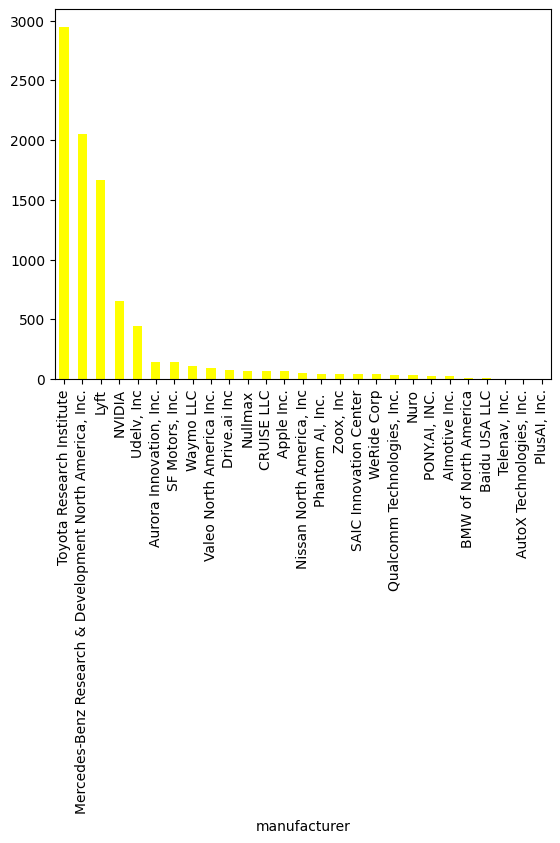

In [155]:
print(df["manufacturer"].value_counts())
df["manufacturer"].value_counts().plot(kind="bar", color="yellow")

**Here we can see number of reports from each 28 copanies. "Toyota Research Institute" has the highest reports and "Mercedes-Benz Research & Development North America, Inc." is the second one. "PlusAI" manufacturer has the least number of reports in this dataset. 19 of companies has less than 100 reports and 5 of them has less than 10 reports.**

**Let's see each of the "Toyota Research Institute" reports and figure out which vehicle of this manufacturer has the most reports.**

Text(0.5, 1.0, 'manufacturer')

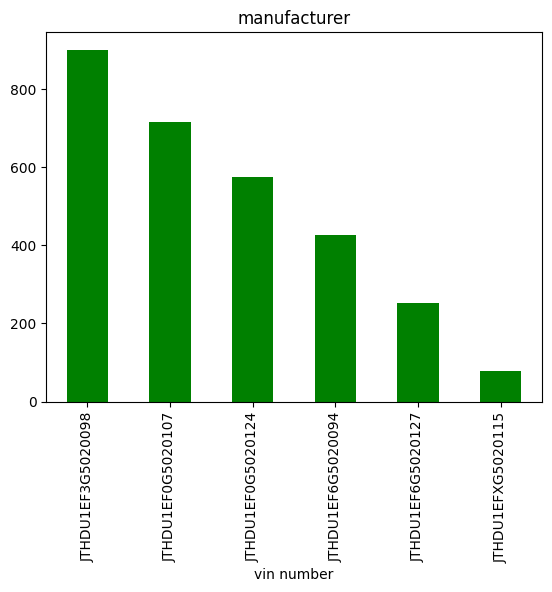

In [143]:
Toyota = df[df["manufacturer"]=="Toyota Research Institute"]
Toyota["vin number"].value_counts().plot(kind="bar", color="green")
plt.title("manufacturer")

**Here we can see different models from Toyota Research Institute.**

In [144]:
Toyota[Toyota["driver necessity"]=="yes"]

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date


In [145]:
Toyota[Toyota["driver present"]=="no"]

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date


**So there are 6 vehicles from Toyota company 4 of them have more than 100 reports.Let's see in how many of them the driver was not present. This dataset shows that none of the cars from this company need presence of the driver but drivers were in the vehicle.**

In [146]:
driver_necessity = df[df["driver necessity"]=="yes"]
driver_necessity

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date
240,BMW of North America,AVT009,WBA7E21080G412861,yes,yes,AV System,Rural Road,"Clear weather, good surface conditions. Diseng...",2019-11-23
241,BMW of North America,AVT009,WBA7E21050G412347,yes,yes,AV System,Rural Road,"Clear weather, good surface conditions. Diseng...",2019-11-23
242,BMW of North America,AVT009,WBA7E21050G412347,yes,yes,AV System,Rural Road,"Clear weather, good surface conditions. Diseng...",2019-11-23
243,BMW of North America,AVT009,WBA7E21050G412347,yes,yes,AV System,Rural Road,"Clear weather, good surface conditions. Diseng...",2019-11-23
244,BMW of North America,AVT009,WBA7E21050G412347,yes,yes,AV System,Rural Road,"Clear weather, good surface conditions. Diseng...",2019-11-23
...,...,...,...,...,...,...,...,...,...
8597,"Udelv, Inc",AVT029,NM0LS7F79J1360493,yes,yes,Test driver,street,Unwanted maneuver or stop by vehicle - the veh...,2019-11-25
8598,"Udelv, Inc",AVT029,NM0LS7F79J1360493,yes,yes,Test driver,street,Unwanted maneuver or stop by vehicle - the veh...,2019-11-25
8599,"Udelv, Inc",AVT029,NM0LS7F79J1360493,yes,yes,Test driver,street,Unwanted maneuver or stop by vehicle - the veh...,2019-11-25
8600,"Udelv, Inc",AVT029,NM0LS7F79J1360493,yes,yes,Test driver,street,Unwanted maneuver or stop by vehicle - the veh...,2019-11-25


**Only 564 vehicle had the driver necessity rule in this dataset. Let's see if in any of them the driver was not present.**

In [165]:
driver_necessity[driver_necessity["driver present"]=="no"]

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date


In [148]:
df[df["driver present"]=="no"]

,manufacturer,permit number,vin number,driver necessity,driver present,initiated by,location,description,date


**Apparently all drivers were there! (in all vehicles)**

**Now let's see what caused the disengagment.**

Text(0.5, 1.0, 'disengagment initiated by')

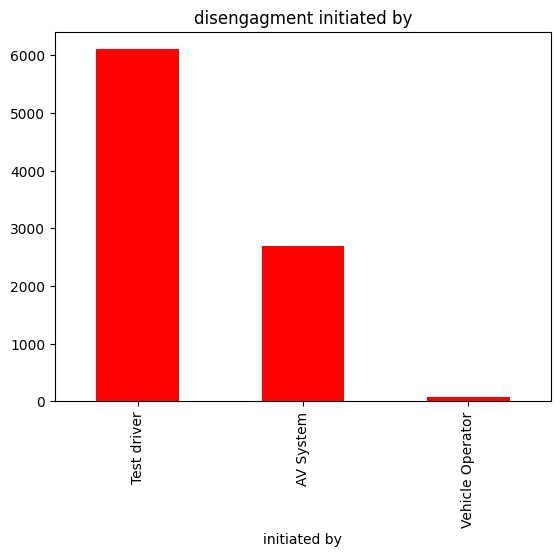

In [149]:
df["initiated by"].value_counts().plot(kind="bar", color="red")
plt.title("disengagment initiated by")

**There are 3 unique resoans that the vehicle diseggagment report happend and the main resoan is Test driver. Intersting that none of the reports was related to passengers and the vehicle handeled the situation well if there any passenger around it.**

Text(0.5, 1.0, 'Locations of the disengagment')

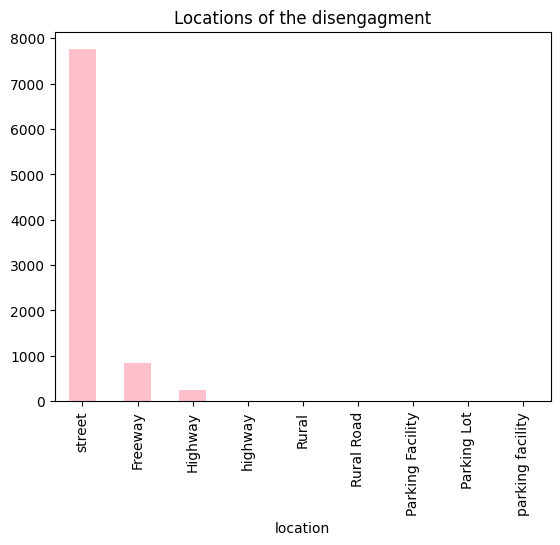

In [150]:
df["location"].value_counts().plot(kind="bar", color="pink")
plt.title("Locations of the disengagment")

**Most reports are in steerts, freeway and highway and number of reports in other locations are very low.**

# Step 4 | Visualization

Text(0.5, 1.0, 'Number of reports in each month')

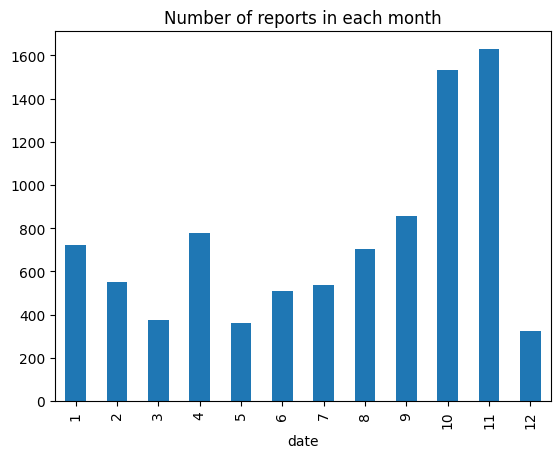

In [159]:
df["date"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Number of reports in each month")

**Let's if there are rows with "driver necessity=Yes" and "driver present=No" condition.**

Text(0.5, 1.0, 'driver necessity=Yes and driver present=No')

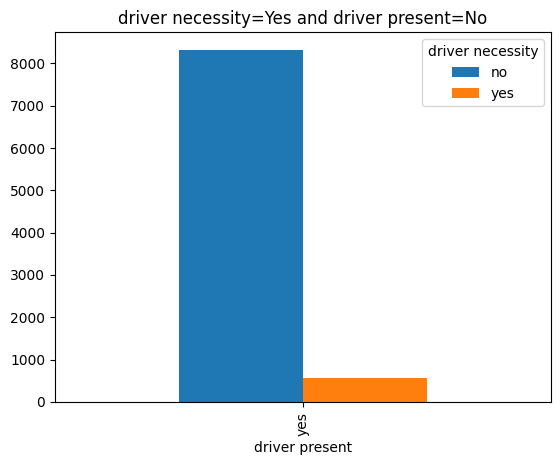

In [168]:
pd.crosstab(df["driver present"], df["driver necessity"]).plot(kind="bar")
plt.title("driver necessity=Yes and driver present=No")

**In all reports the drivers were present but only less than 1000 vehicles had driver necessity rule.**

### So in this notebook we checked out Autonomous Vehicle Disengagement Reports and had an EDA on it. In this dataset top manufacurere with most reports was "Toyota Research Institute", Mercedes-Benz Research & Development North America, Lyft, NVDIA and Udelv.